# Data Exploration and EDA

In [1]:
# Hardware configuration 
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5127350184451147196
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3587998273621539285
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [2]:
# Importing Important libraries
import os
import sys
sys.path.append('/home/studio-lab-user/Krishi')
import tensorflow as tf
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Functions from Local Packages
from src.utils import get_path

In [4]:
# No. of Directories containing images (data) for training, testing & validation 
plant_dirs = list(os.listdir('/home/studio-lab-user/Krishi/data'))[1:]
plant_dirs

['Apple',
 'Bell Pepper',
 'Cherry',
 'Corn (Maize)',
 'Grape',
 'Peach',
 'Potato',
 'Strawberry',
 'Tomato']

In [5]:
# Image dimensionality and batch size
image_size = (256, 256)
batch_size = 32

In [6]:
train_dataset = {}
print('================ Images & Classes for Training ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    train_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Train'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_size,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Training ================

>>> No. of Images & Classes in "Apple" directory
Found 7771 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 3901 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 3509 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 7316 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 7222 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 3566 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 5702 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 3598 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 18345 files

In [7]:
test_dataset = {}
print('================ Images & Classes for Testing ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    test_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Test'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_size,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Testing ================

>>> No. of Images & Classes in "Apple" directory
Found 1747 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 877 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 788 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 1645 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 1623 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 801 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 1282 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 809 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 4123 files belon

In [8]:
val_dataset = {}
print('================ Images & Classes for Validation ================\n')
for plant in plant_dirs:
    print('>>> No. of Images & Classes in "{}" directory'.format(plant))
    val_dataset[plant] = image_dataset_from_directory(get_path(plant, 'Val'),
                                                        shuffle = True,
                                                        labels = 'inferred',
                                                        label_mode = 'int',
                                                        image_size = image_size,
                                                        batch_size = batch_size)
    print ("______________\n")

================ Images & Classes for Validation ================

>>> No. of Images & Classes in "Apple" directory
Found 196 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 98 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 89 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 184 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 182 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 90 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 144 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 91 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 462 files belonging t

In [9]:
classes = {}
for plant in plant_dirs:
    print('>>> Classes in {} dataset :-'.format(plant))
    classes[plant] = []
    for num,cat in enumerate(train_dataset[plant].class_names, start = 1):
        classes[plant].append(cat)
        print(num, cat)
    print('\n')

>>> Classes in Apple dataset :-
1 Apple Scab
2 Black Rot
3 Cedar Apple Rust
4 Healthy


>>> Classes in Bell Pepper dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Cherry dataset :-
1 Healthy
2 Powdery Mildew


>>> Classes in Corn (Maize) dataset :-
1 Cercospora Leaf Spot
2 Common Rust 
3 Healthy
4 Northern Leaf Blight


>>> Classes in Grape dataset :-
1 Black Rot
2 Esca (Black Measles)
3 Healthy
4 Leaf Blight


>>> Classes in Peach dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Potato dataset :-
1 Early Blight
2 Healthy
3 Late Blight


>>> Classes in Strawberry dataset :-
1 Healthy
2 Leaf Scorch


>>> Classes in Tomato dataset :-
1 Bacterial Spot
2 Early Blight
3 Healthy
4 Late Blight
5 Leaf Mold
6 Mosaic Virus
7 Septoria Leaf Spot
8 Target Spot
9 Two-Spotted Spider Mite
10 Yellow Leaf Curl Virus




>>> Sample Images of "Apple" dataset


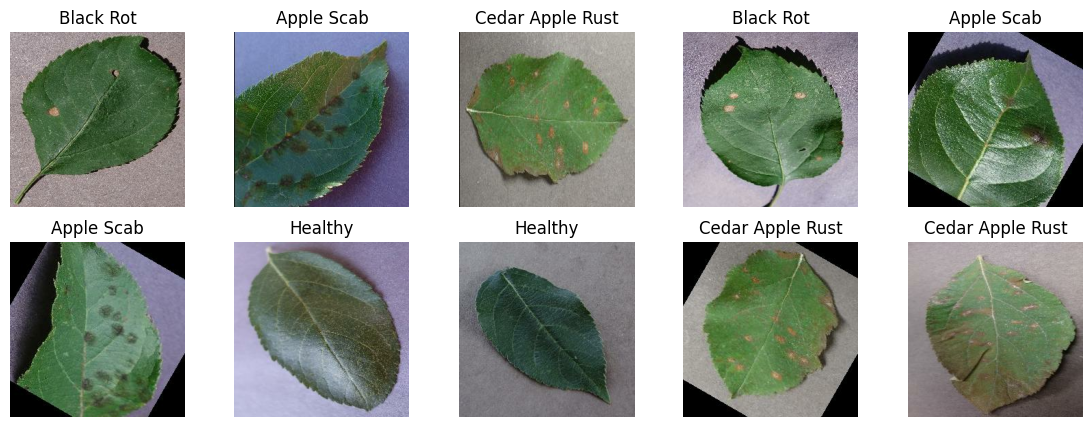



>>> Sample Images of "Bell Pepper" dataset


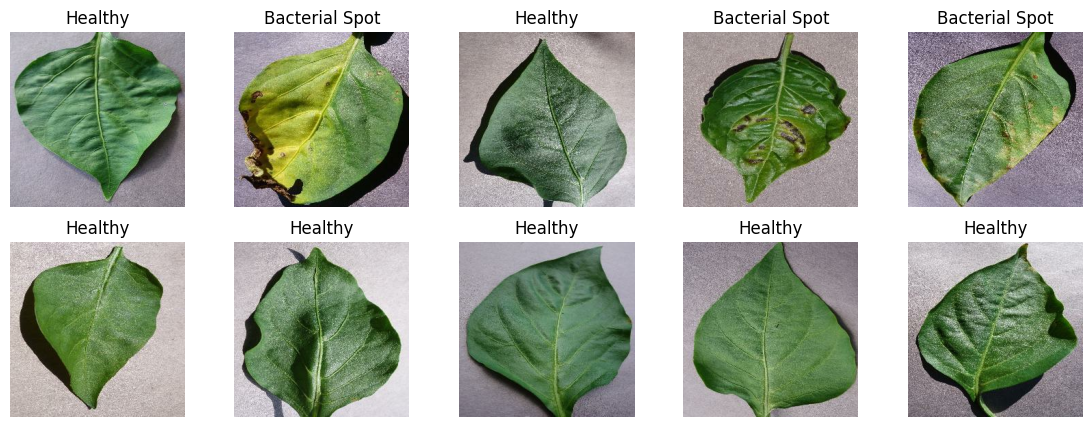



>>> Sample Images of "Cherry" dataset


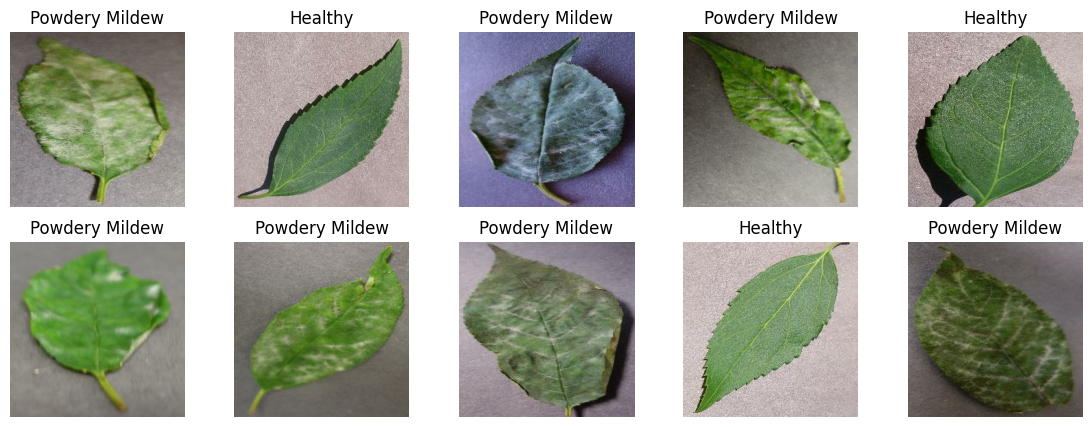



>>> Sample Images of "Corn (Maize)" dataset


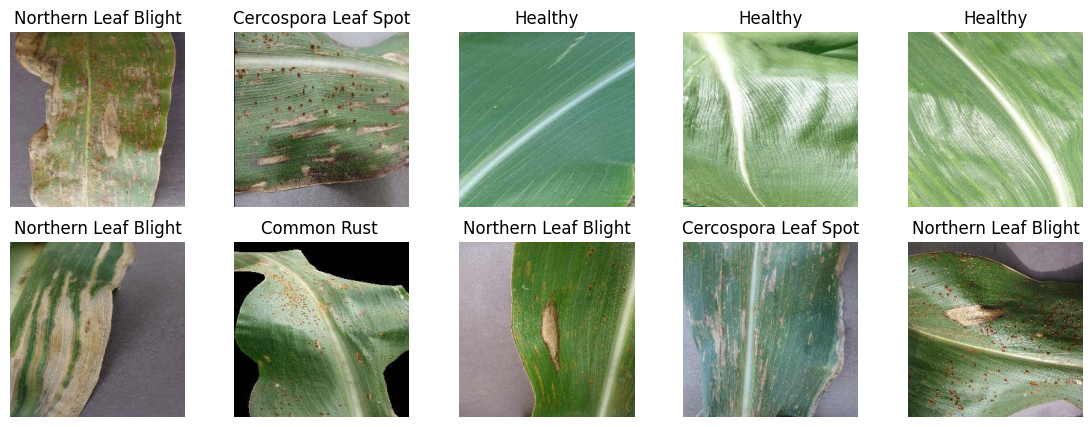



>>> Sample Images of "Grape" dataset


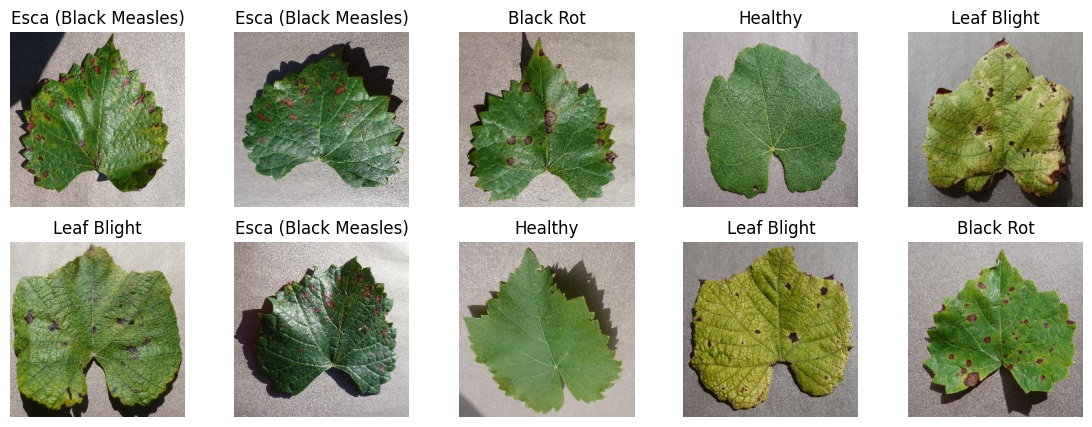



>>> Sample Images of "Peach" dataset


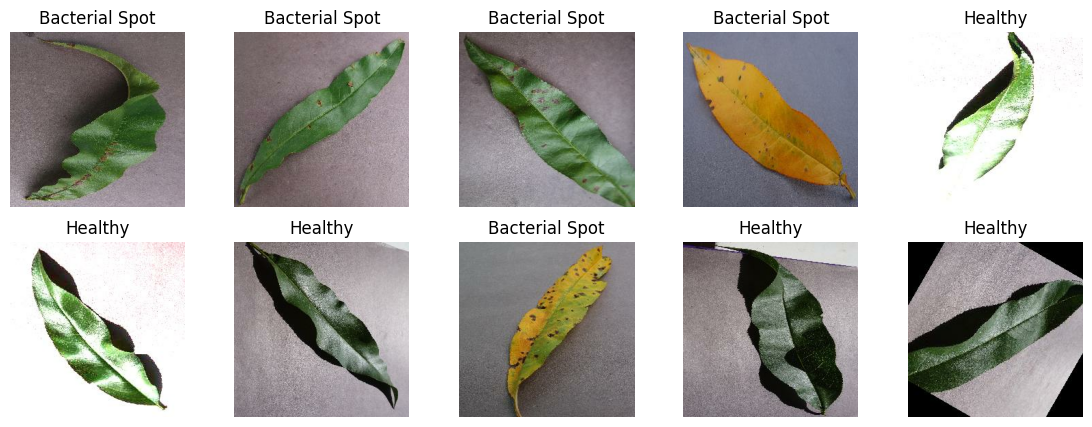



>>> Sample Images of "Potato" dataset


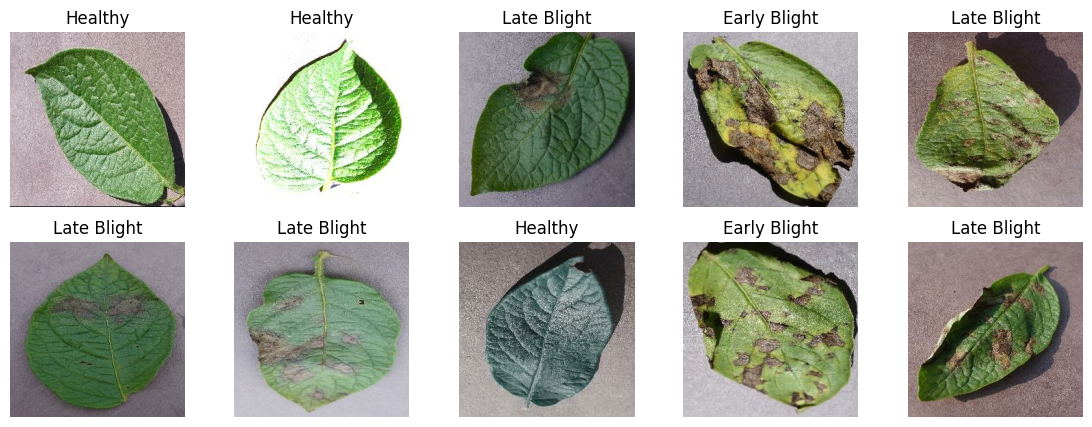



>>> Sample Images of "Strawberry" dataset


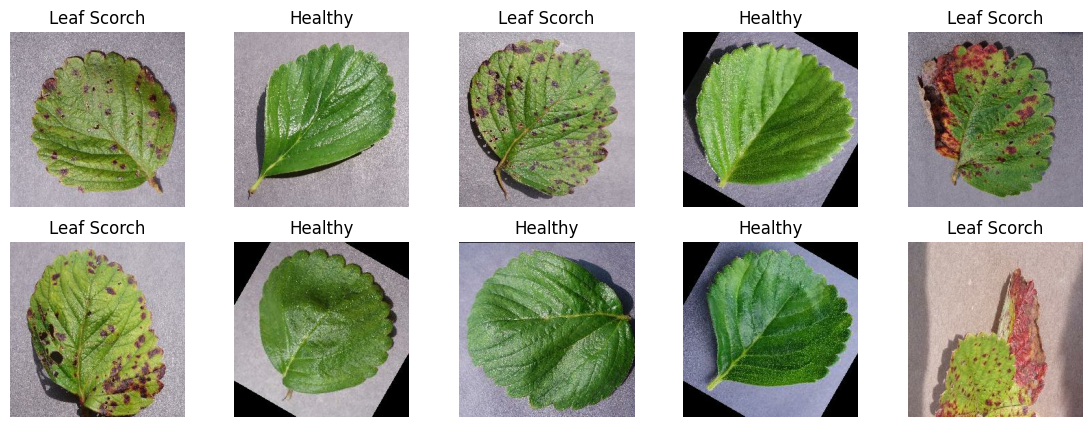



>>> Sample Images of "Tomato" dataset


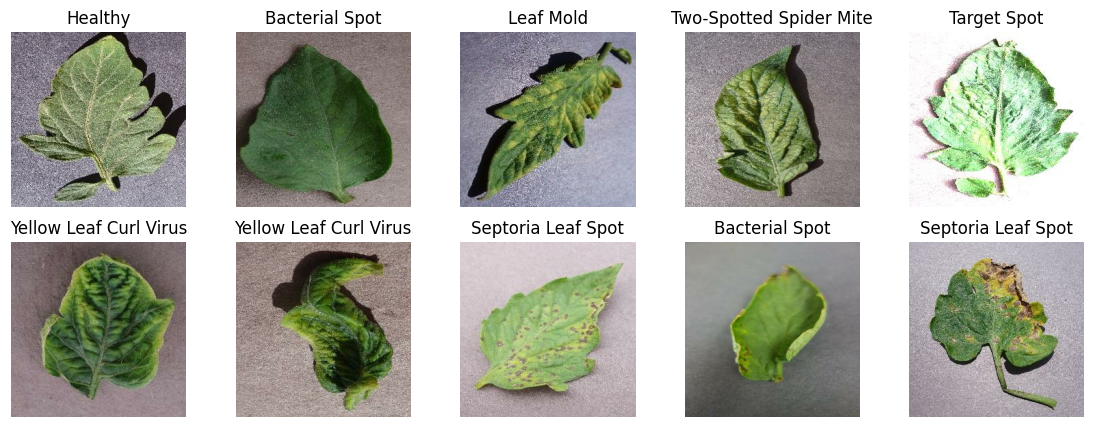

In [11]:
for plant in plant_dirs:
    print('>>> Sample Images of "{}" dataset'.format(plant))
    plt.figure(figsize = (14,5))
    for image_batch, image_label in train_dataset[plant].take(1):
        for i in range(10):
            plt.subplot(2,5,i+1)
            plt.imshow(image_batch[i].numpy().astype('uint8'))
            plt.title(classes[plant][image_label[i]])
            plt.axis('off')
        plt.show()    
    print('\n')